In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_c4e868c5894b4e2dbf342c0402d7bba3 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='_gzWsvpIgqlPQb1LOm5M2Cn4VydPN8rRQSGvkBQzO_RE',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_c4e868c5894b4e2dbf342c0402d7bba3.get_object(Bucket='breastcancer-donotdelete-pr-hzazxprvd3g8nr',Key='bcancer.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


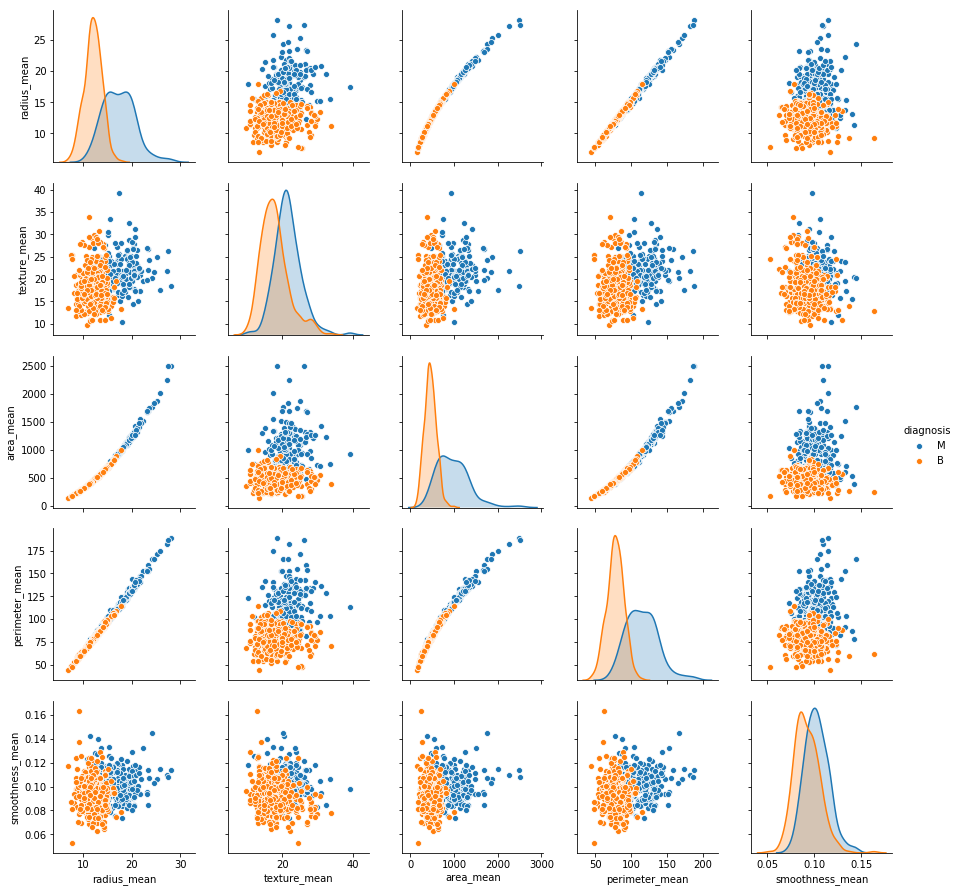

In [7]:
df.drop(['Unnamed: 32'],axis=1,inplace=True)
sns.pairplot(df, hue = 'diagnosis', vars = ['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean', 'smoothness_mean'] )

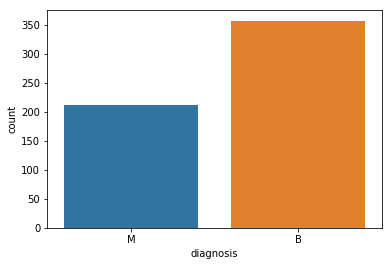

In [3]:
sns.countplot(df['diagnosis'], label = "Count")

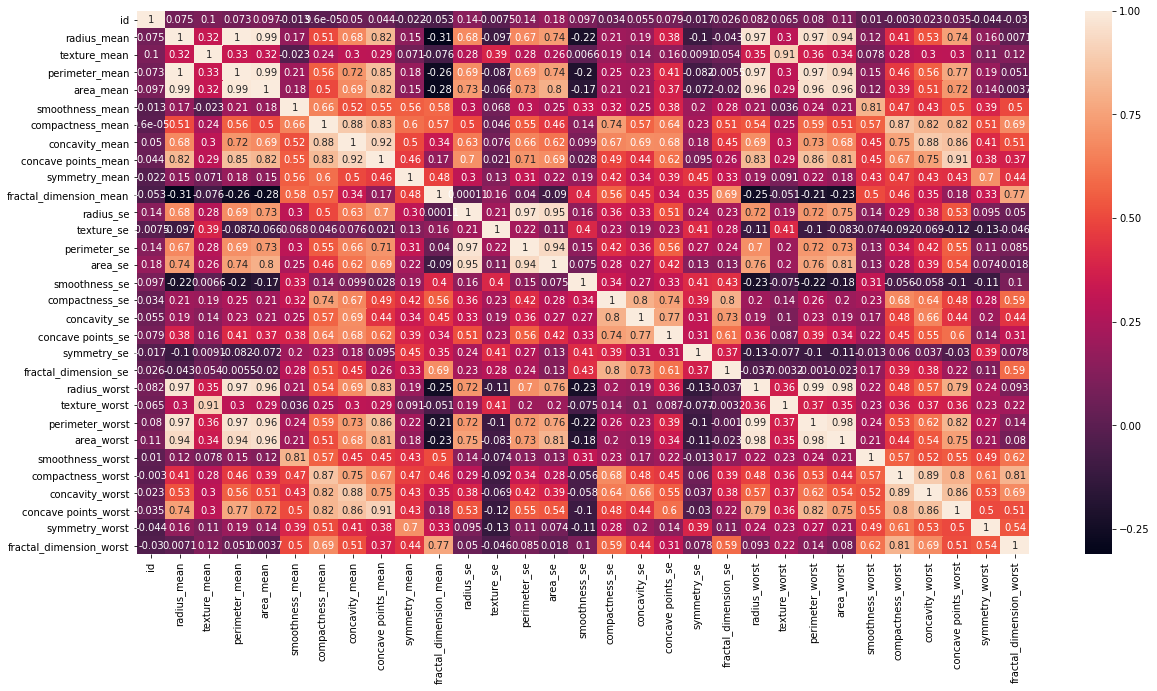

In [8]:
# Let's check the correlation between the variables 
# Strong correlation between the mean radius and mean perimeter, mean area and mean primeter
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True)

In [10]:
# Let's drop the target label coloumns
y=df['diagnosis']
X = df.drop(['diagnosis'],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


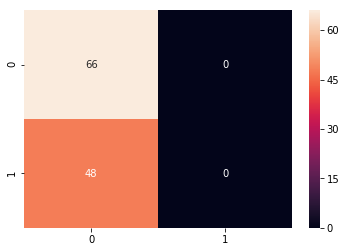

In [13]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [14]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           B       0.58      1.00      0.73        66
           M       0.00      0.00      0.00        48

   micro avg       0.58      0.58      0.58       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.34      0.58      0.42       114



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


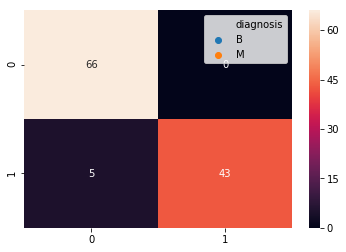

In [17]:
#model Improvement
min_train = X_train.min()
range_train = (X_train - min_train).max()
min_test=X_test.min()
range_test=(X_test-min_test).max()
X_train_scaled = (X_train - min_train)/range_train
X_test_scaled= (X_test - min_test)/range_test
sns.scatterplot(x = X_train['area_mean'], y = X_train['smoothness_mean'], hue = y_train)
svc_model.fit(X_train_scaled, y_train)
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm,annot=True,fmt="d")

In [18]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           B       0.93      1.00      0.96        66
           M       1.00      0.90      0.95        48

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

